# Descriptive statistics

- Data overview

- Numerical features

- Categorical features

- Correlations and relationships

- Preliminary insights

## DATA OVERVIEW

In [27]:
import pandas as pd
import numpy as np

dtypes = {
    "Gender": "category",
    "Age Group": "category",
    "Preferred Category": "category",
    "Age": "int32",
    "Annual Income (k$)": "int32",
    "Spending Score (1-100)": "int32",
    "Credit Score": "int32",
    "Loyalty Years": "int32",
    "Estimated Savings (k$)": "float32"
}

df = pd.read_csv("../data/processed/mall_customers_cleaned.csv", dtype=dtypes)

In [29]:
def mem_mb(df: pd.DataFrame) -> float: # memory usage in MB
    return df.memory_usage(deep=True).sum() / (1024**2)

def overview(df: pd.DataFrame, name: str, top_k=10): # top_k: top values to show for categoricals
    print(f"\n=== {name.upper()} ===")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} cols")
    print(f"Memory: {mem_mb(df):.2f} MB")

    summary = pd.DataFrame({ # summary table
        "dtype": df.dtypes.astype(str),
        "non_null": df.notna().sum(),
        "missing_pct": (df.isna().mean()*100).round(2),
        "n_unique": df.nunique(dropna=True)
    }).sort_values("missing_pct", ascending=False)
    display(summary)

    dup_rows = int(df.duplicated().sum()) # duplicated rows
    print(f"Duplicate rows: {dup_rows}")

    num_cols = df.select_dtypes(include=[np.number]).columns.tolist() # numeric columns
    if num_cols:
        print("\nNumeric columns - describe():")
        display(df[num_cols].describe().T)

    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist() # categorical columns
    if cat_cols:
        print("\nCategoricals - top values:")
        for c in cat_cols:
            vc = df[c].value_counts(dropna=False).head(top_k)
            print(f"\n[{c}] top {min(top_k, vc.shape[0])}:")
            display(vc.to_frame("count"))

overview(df, "Mall Customers")


=== MALL CUSTOMERS ===
Shape: 200 rows × 9 cols
Memory: 0.01 MB


,dtype,non_null,missing_pct,n_unique
Gender,category,200,0.0,2
Age,int32,200,0.0,51
Annual Income (k$),int32,200,0.0,64
Spending Score (1-100),int32,200,0.0,84
Age Group,category,200,0.0,5
Estimated Savings (k$),float32,200,0.0,191
Credit Score,int32,200,0.0,91
Loyalty Years,int32,200,0.0,8
Preferred Category,category,200,0.0,4


Duplicate rows: 0

Numeric columns - describe():


,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.850000,13.969007,18.00,28.750000,36.00,49.000000,70.000000
Annual Income (k$),200.0,60.560000,26.264721,15.00,41.500000,61.50,78.000000,137.000000
Spending Score (1-100),200.0,50.200000,25.823522,1.00,34.750000,50.00,73.000000,99.000000
Estimated Savings (k$),200.0,40.247948,21.333448,6.46,28.799999,36.41,44.967499,120.559998
Credit Score,200.0,743.680000,155.176727,300.00,697.000000,833.00,850.000000,850.000000
Loyalty Years,200.0,5.930000,1.570808,2.00,5.000000,6.00,7.000000,9.000000



Categoricals - top values:

[Gender] top 2:


,count
Gender,
Female,112
Male,88



[Age Group] top 5:


,count
Age Group,
36-50,62
26-35,60
18-25,38
51-65,28
65+,12



[Preferred Category] top 4:


,count
Preferred Category,
Electronics,78
Luxury,54
Fashion,41
Budget,27


## NUMERIC COLUMNS - PLOTS

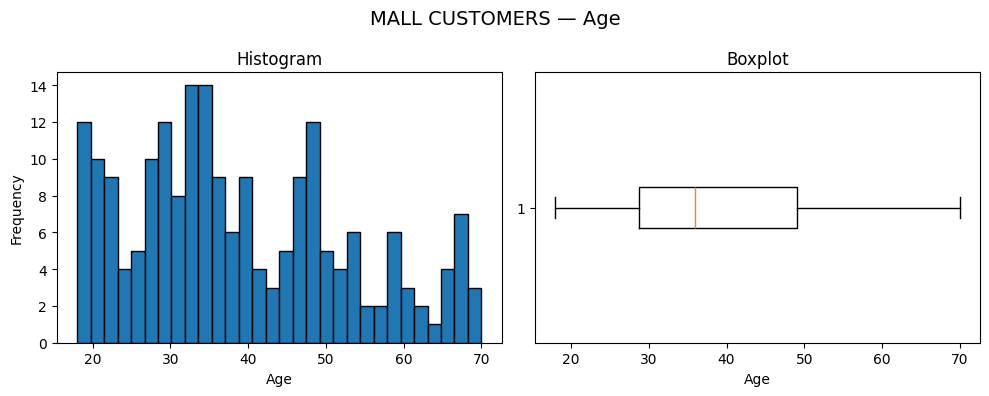

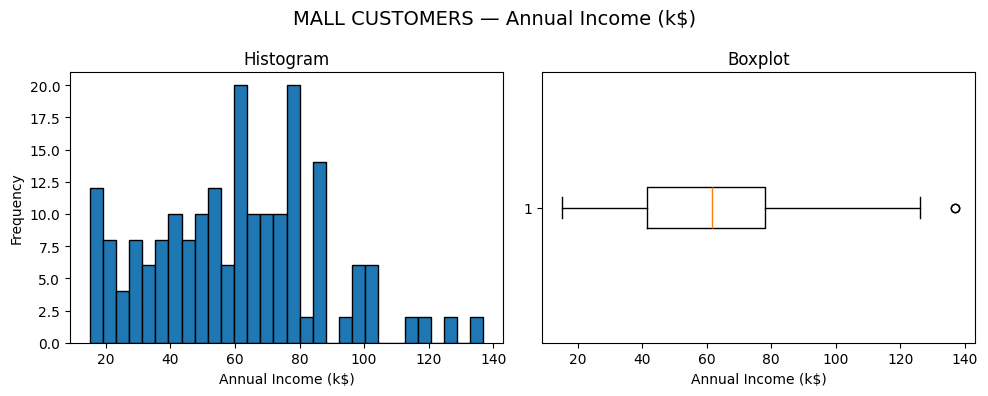

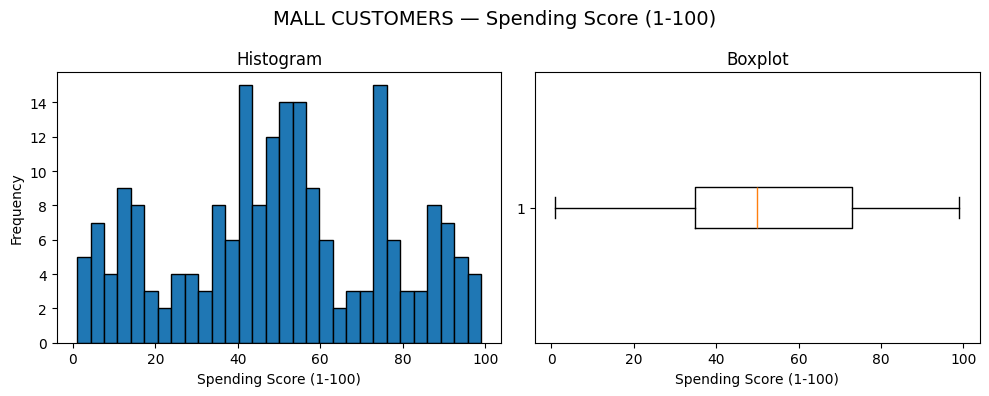

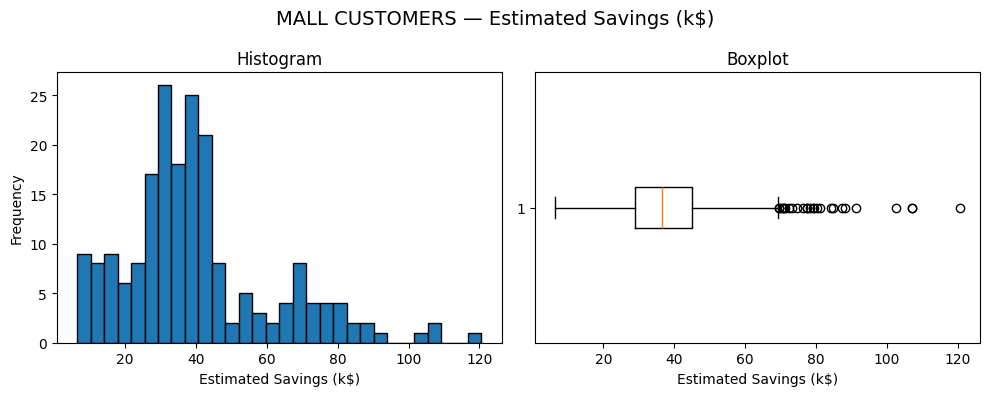

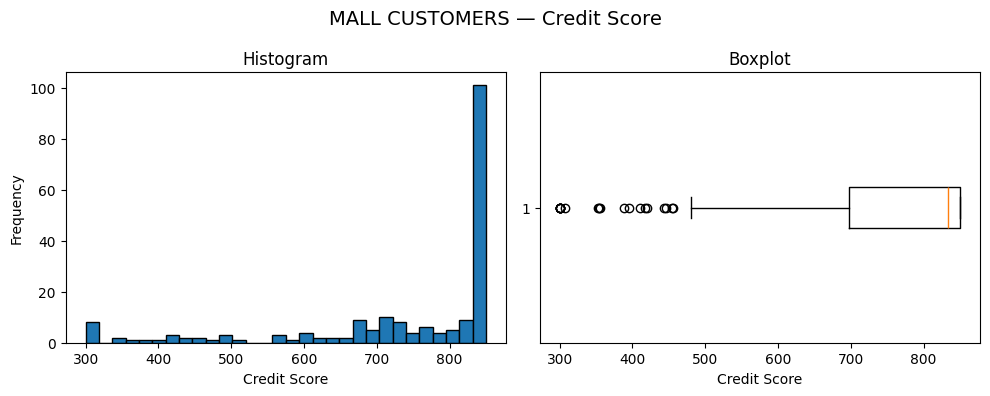

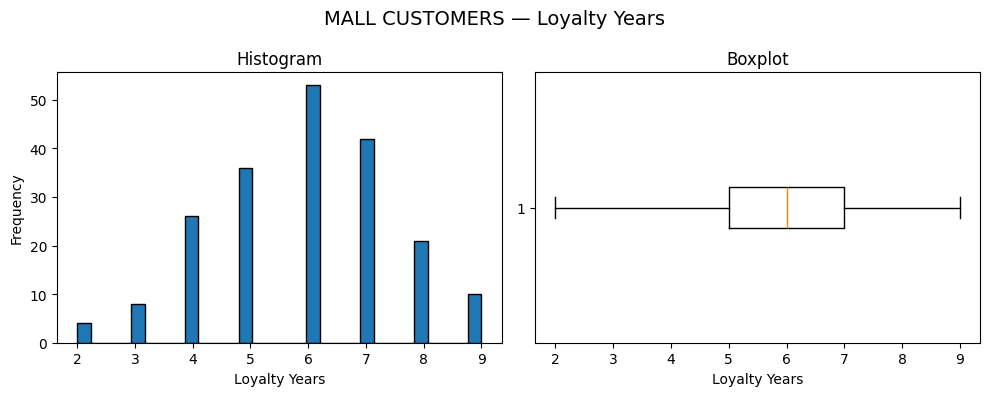

In [30]:
import matplotlib.pyplot as plt

def plot_numeric(df, name):
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        fig.suptitle(f"{name.upper()} — {col}", fontsize=14)

        axes[0].hist(df[col].dropna(), bins=30, edgecolor="black")
        axes[0].set_title("Histogram")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frequency")

        axes[1].boxplot(df[col].dropna(), vert=False)
        axes[1].set_title("Boxplot")
        axes[1].set_xlabel(col)

        plt.tight_layout()
        plt.show()

plot_numeric(df, "Mall Customers")

## CATEGORICAL COLUMNS - CHARTS

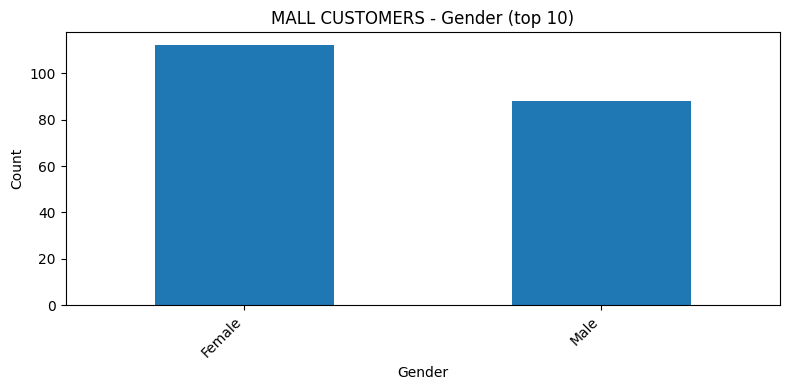

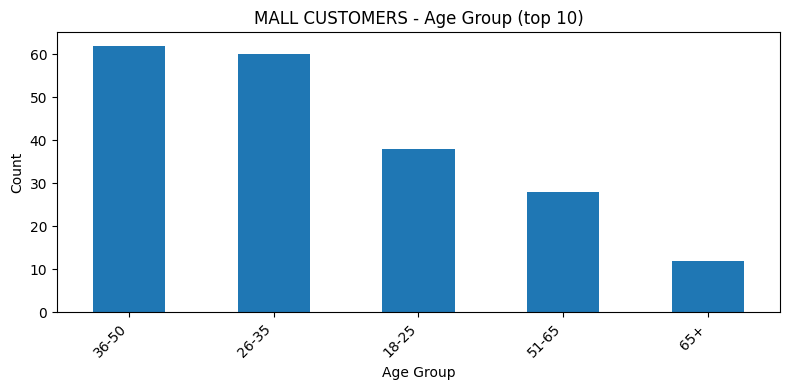

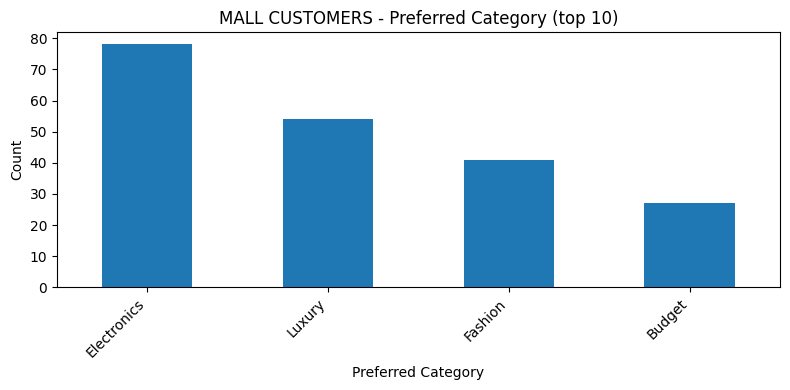

In [31]:
def plot_categoricals(df, name, top_k=10):
    cat_cols = []
    for c in df.columns:
        dt = df[c].dtype
        if isinstance(dt, pd.CategoricalDtype) or dt == object:
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                continue
            if "date" in c.lower() or "time" in c.lower():
                continue
            cat_cols.append(c)

    for col in cat_cols:
        vc = df[col].value_counts(dropna=False).head(top_k)

        plt.figure(figsize=(8, 4))
        vc.plot(kind="bar")
        plt.title(f"{name.upper()} - {col} (top {top_k})")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

plot_categoricals(df, "Mall Customers")

## CORRELATIONS

We are doing customer segmentation - so we are interested in:

- do the customers form any natural groups? Check by spending, by income, by savings

- are there clear differences between demographics? Which age groups spend most/save most, which genders

Heatmaps help with correlations between numeric features. Then we will look at correlations between categorical vs numeric features. Scatterplots help visualize potential clusters.


=== MALL CUSTOMERS — Correlation Matrix ===


,Age,Annual Income (k$),Spending Score (1-100),Estimated Savings (k$),Credit Score,Loyalty Years
Age,1.000000,-0.012398,-0.327227,0.125731,0.236902,0.606172
Annual Income (k$),-0.012398,1.000000,0.009903,0.813487,0.749183,-0.020360
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.515495,-0.295882,0.533287
Estimated Savings (k$),0.125731,0.813487,-0.515495,1.000000,0.689321,-0.325123
Credit Score,0.236902,0.749183,-0.295882,0.689321,1.000000,-0.056621
Loyalty Years,0.606172,-0.020360,0.533287,-0.325123,-0.056621,1.000000


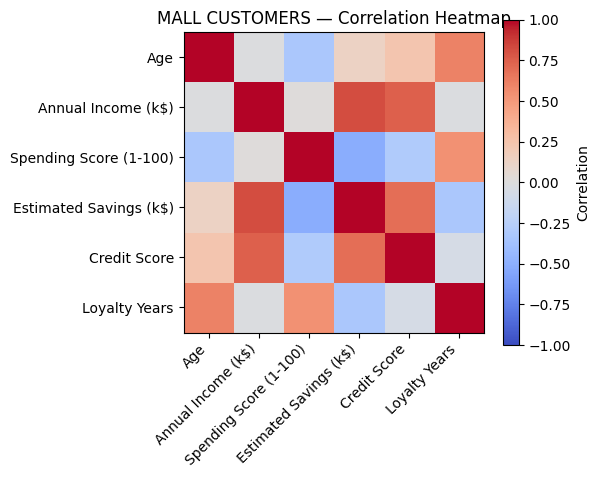

In [32]:
def correlation_analysis(df, name):
    num_df = df.select_dtypes(include=[np.number])
    if num_df.shape[1] < 2:
        print(f"\n{name.upper()} — not enough numeric columns for correlations.")
        return
    
    corr = num_df.corr(method="pearson")
    print(f"\n=== {name.upper()} — Correlation Matrix ===")
    display(corr)

    plt.figure(figsize=(6,5))
    plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
    plt.colorbar(label="Correlation")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title(f"{name.upper()} — Correlation Heatmap")
    plt.tight_layout()
    plt.show()

correlation_analysis(df, "Mall Customers")

Clearly income is connected to savings and the credit score - makes sense. Also loyalty years are obviously dependant on the person's age.

## RELATIONSHIPS - CATEGORICAL FEATURES


INCOME BY GENDER:


,Annual Income (k$)
Gender,
Male,62.227273
Female,59.250000


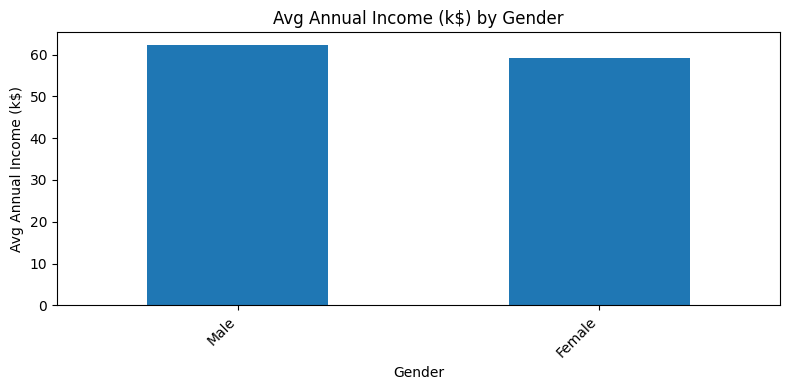


SPENDING BY AGE GROUP:


,Spending Score (1-100)
Age Group,
26-35,64.450000
18-25,54.947368
65+,47.250000
36-50,41.709677
51-65,33.285714


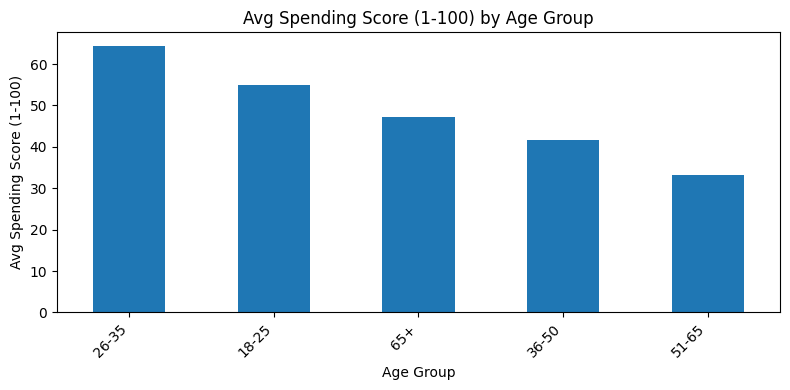


CREDIT SCORE BY CATEGORY:


,Credit Score
Preferred Category,
Electronics,804.923077
Fashion,802.707317
Luxury,665.907407
Budget,632.666667


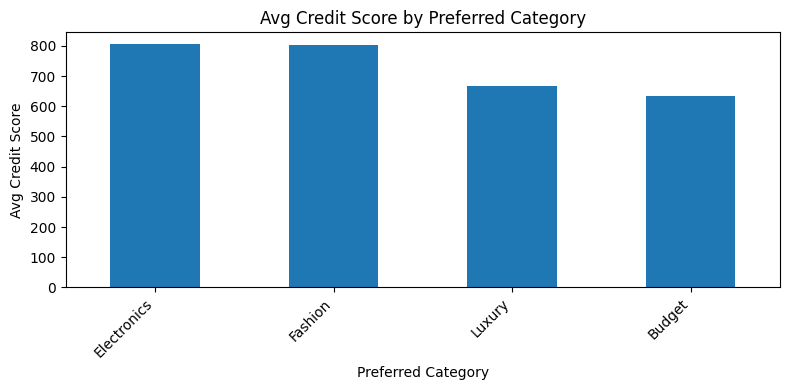

In [35]:
def numeric_vs_categorical(df, num_col, cat_col, name):
    if num_col not in df.columns or cat_col not in df.columns:
        return
    grouped = df.groupby(cat_col, observed=True)[num_col].mean().sort_values(ascending=False)
    print(f"\n{name.upper()}:")
    display(grouped.to_frame())
    
    plt.figure(figsize=(8,4))
    grouped.plot(kind="bar")
    plt.title(f"Avg {num_col} by {cat_col}")
    plt.ylabel(f"Avg {num_col}")
    plt.xlabel(cat_col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

numeric_vs_categorical(df, "Annual Income (k$)", "Gender", "Income by Gender")
numeric_vs_categorical(df, "Spending Score (1-100)", "Age Group", "Spending by Age Group")
numeric_vs_categorical(df, "Credit Score", "Preferred Category", "Credit Score by Category")

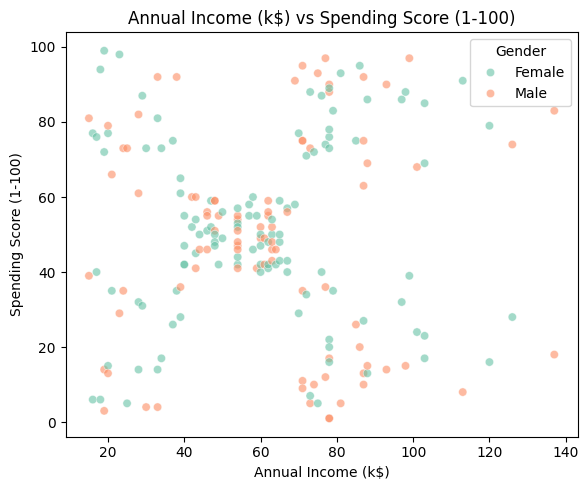

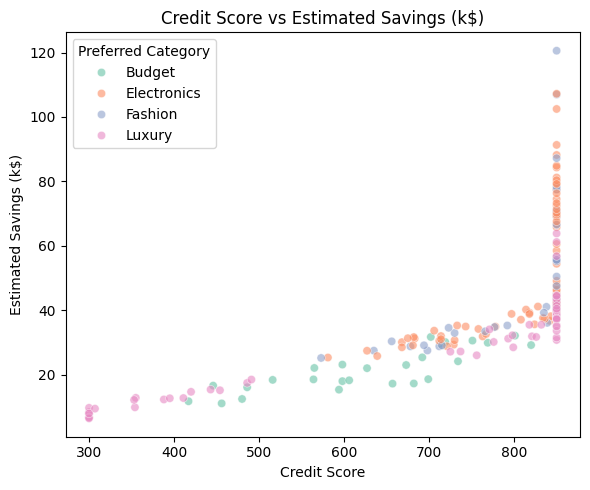

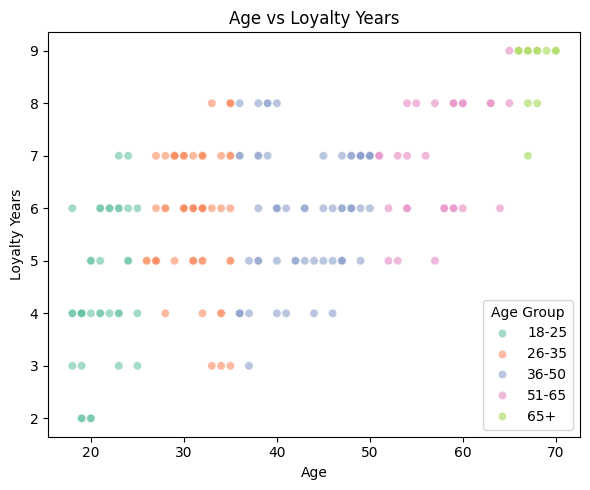

In [37]:
import seaborn as sns

def scatter_relationship(df, x_col, y_col, name, hue=None):
    if x_col not in df.columns or y_col not in df.columns:
        return
    
    plt.figure(figsize=(6,5))
    
    if hue and hue in df.columns:
        sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue, alpha=0.6, palette="Set2")
    else:
        plt.scatter(df[x_col], df[y_col], alpha=0.3)
    
    plt.title(f"{x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()

scatter_relationship(df, "Annual Income (k$)", "Spending Score (1-100)", "Income vs Spending", hue="Gender")
scatter_relationship(df, "Credit Score", "Estimated Savings (k$)", "Credit vs Savings", hue="Preferred Category")
scatter_relationship(df, "Age", "Loyalty Years", "Age vs Loyalty", hue="Age Group")